# Figure 22 - Opacity of dust/droplet mixtures

Script to plot Figure 22 in Stewart et al. Calculates the mean free path for different densities and mixtures of a dust and a droplet population

## Load modules

In [1]:
%run import-modules-grid

from scipy import constants as const
from scipy.optimize import fsolve

#plotting
import matplotlib as mpl
import pylab
import matplotlib.cm as cm
from matplotlib import gridspec
mpl.rcParams.update(mpl.rcParamsDefault)

#import colormaps
import colormaps as cmaps
import matplotlib.cm as cm
import matplotlib.colors as colors


print('done')

Platform:  Darwin Kernel Version 24.1.0: Thu Oct 10 21:00:32 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T6030
python version:  3.11.10
matplotlib version:  3.9.2
hvplot version:  0.11.0
numpy version:  2.1.2
pandas version:  2.2.3
pickle version:  4.0
yaml version:  6.0.2
pint version:  0.24.3
pyko version:  v0.8.3-dev-2024-05-12
print eos_table version:  v1.1.5b

Number of CPUs in the system: 12
done


## Parameters for plot

In [2]:
###########################################################
###########################################################
###########################################################
#PARAMS
Nplot=1000

#size of two populations
#micron dust
rho1=3E3
D1=1E-6

#mm chondrules
rho2=3E3
D2=1E-3

#range of mass densities
mass_density=np.logspace(-6,-2,Nplot)

#range of mass fractions of two populations
mfrac1=np.linspace(0,1,Nplot+1)

#contours to plot
LMFPcontours=np.logspace(-1,6,15)
LMFPcontours_ticks=np.linspace(-1,6,15)

ncontours=np.logspace(7,13,13)
ncontours_ticks=np.linspace(7,13,13)

#flag as to whether to tidy up the color bars
flag_finished=0

## Calculate the mean free path

In [3]:
################
#calculate the mean free path
################
LMFP=np.empty([np.size(mass_density), np.size(mfrac1)])
n=np.empty([np.size(mass_density), np.size(mfrac1)])

#find the values
for i in np.arange(np.size(mass_density)):
    # print(i)
    for j in np.arange(np.size(mfrac1)):
        #using equations given in text
        LMFP[i,j]=4.0/(6.0*mass_density[i]*((mfrac1[j]/rho1/D1)+((1.0-mfrac1[j])/rho2/D2)))
        n[i,j]=(6.0/np.pi)*mass_density[i]*((mfrac1[j]/rho1/(D1**3))+((1.0-mfrac1[j])/rho2/(D2**3)))
        
print('done')

done


## Make the figure

done


<Figure size 350x600 with 0 Axes>

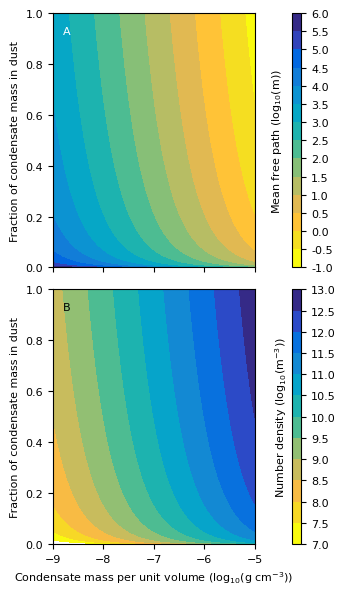

In [4]:
################
#plot the mean free path
################
#initialise the figure
if 1:
    #repeat code to get the spacing right
    fig = plt.figure(figsize=(3.5,6.0))
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[1,(3.0/67.0)]
                           )
    font = {
            'weight' : 'normal',
            'size'   : 8}
    
    mpl.rc('font', **font)
    
    fig.tight_layout()
    plt.savefig('plots/Fig22-Mean_free_path.pdf',pad_inches=0.1,bbox_inches='tight')

fig = plt.figure(figsize=(3.5,6.0))
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,(3.0/67.0)]
                       )
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])
ax_col=plt.subplot(gs[1])
ax_col2=plt.subplot(gs[3])


font = {
        'weight' : 'normal',
        'size'   : 8}


# mpl.rc('text.latex', preamble=r'\usepackage{cmbright}')
# mpl.rcParams['text.usetex'] = False
mpl.rc('font', **font)


#make a set of contours
FFF, PPP  = np.meshgrid(mfrac1,mass_density)
contour_LMFP = ax1.contourf(np.log10(PPP*1E-3), FFF, np.log10(LMFP), levels=np.log10(LMFPcontours), colors=cmaps.parula(np.linspace(1, 0, np.size(LMFPcontours)-1)))

contour_n = ax2.contourf(np.log10(PPP*1E-3), FFF, np.log10(n), levels=np.log10(ncontours), colors=cmaps.parula(np.linspace(1, 0, np.size(ncontours)-1)))


ax1.set_ylabel('Fraction of condensate mass in dust')
plt.setp( ax1.get_xticklabels(), visible=False)

ax2.set_ylabel('Fraction of condensate mass in dust')
ax2.set_xlabel('Condensate mass per unit volume (log$_{10}$(g cm$^{-3}$))')

ax1.text(0.05, 0.95, 'A', horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax1.transAxes, color='w')
ax2.text(0.05, 0.95, 'B', horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax2.transAxes, color='k')


#add a color bar
norm= colors.BoundaryNorm(boundaries=np.log10(LMFPcontours), ncolors=np.size(LMFPcontours))
cbar=plt.colorbar(contour_LMFP, cax=ax_col, ticks=LMFPcontours_ticks , orientation='vertical')
if flag_finished==1:
    cbar.ax.set_yticklabels(map(str, LMFPcontours_ticks.astype(int)))
    cbar.set_label(r"Mean free path (log$_{10}$(m))", labelpad=-31)
else:
    cbar.ax.set_yticklabels(map(str, LMFPcontours_ticks))
    cbar.set_label(r"Mean free path (log$_{10}$(m))", labelpad=-45)


#add a color bar
norm= colors.BoundaryNorm(boundaries=np.log10(ncontours), ncolors=np.size(ncontours))
cbar=plt.colorbar(contour_n, cax=ax_col2, ticks=ncontours_ticks , orientation='vertical')
if flag_finished==1:
    cbar.ax.set_yticklabels(map(str, ncontours_ticks.astype(int)))
    cbar.set_label(r"Number density (log$_{10}$(m$^{-3}$))", labelpad=-34)
else:
    cbar.ax.set_yticklabels(map(str, ncontours_ticks))
    cbar.set_label(r"Number density (log$_{10}$(m$^{-3}$))", labelpad=-45)



fig.tight_layout()
plt.savefig('plots/Fig22-Mean_free_path.pdf',pad_inches=0.1,bbox_inches='tight')
print('done')